# ◆ 점 추정 실습

In [25]:
# 패키지 임포트
import math

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import pandas as pd # pandas package
import numpy as np # numpy package
from scipy import stats # Scipy Packge

# 시각화 패키지
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"

# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc={"axes.unicode_minus": False})

## 1. 평균의 점 추정

1) 데이터 생성

In [2]:
# 데이터 생성
np.random.seed(100)

math_score = pd.DataFrame(np.random.randint(25, 101, size=500), columns=["점수"])

2) 데이터탐색

In [3]:
# 요약정보
math_score.describe()

,점수
count,500.000000
mean,61.580000
std,21.513374
min,25.000000
25%,42.000000
50%,62.500000
75%,79.000000
max,100.000000


In [4]:
# 데이터 확인
scores = np.array(math_score['점수'])
scores[:5]

array([33, 49, 92, 73, 35])

In [5]:
# 20개 샘플 추출(복원추출)
sample = np.random.choice(scores, 20)
print(sample)
print(sample.mean())
print(sample.var())
print(sample.std())   # np.std(sample) # 편향 표본표준편차

[85 91 85 81 64 96 83 68 53 52 61 80 89 32 95 64 81 72 94 92]
75.9
282.29
16.801488029338355


In [7]:
# 표본에 따라 평균 오차 확인
for i in range(10):
    sample1 = np.random.choice(scores,20)
    print(i+1, "표본평균", sample1.mean())

1 표본평균 60.85
2 표본평균 63.5
3 표본평균 59.9
4 표본평균 71.6
5 표본평균 53.65
6 표본평균 62.9
7 표본평균 63.25
8 표본평균 68.85
9 표본평균 60.45
10 표본평균 69.95


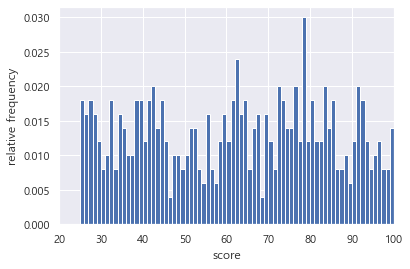

In [8]:
# 모집단 데이터 분포 확인
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.hist(scores, bins=100, range=(0,100), density=True)  # density=True면 상대도수
plt.xlim(20,100)
plt.show()

In [9]:
# 샘플2 10000개 생성하여 분포 확인
sample_score = np.random.choice(scores, 10000)

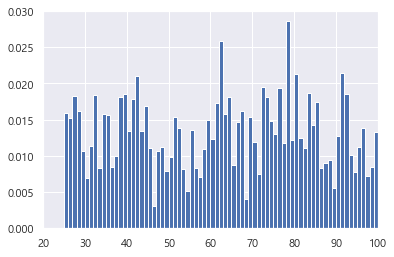

In [10]:
plt.hist(sample_score, bins=100, range=(0,100), density=True)
plt.xlim(20,100)
plt.show()

3) 모평균 점 추정

In [17]:
# 20개(n)의 표본 100번 추출
n = 20
nSample = 100

sample_mean = np.array([np.random.choice(scores, n).mean() for _ in range(nSample)])

In [18]:
# 표본평균 분포 확인
sample_mean

array([62.1 , 64.7 , 60.65, 56.85, 55.7 , 57.3 , 64.5 , 62.4 , 62.45,
       60.2 , 62.45, 65.  , 66.7 , 62.7 , 62.55, 61.5 , 70.3 , 52.95,
       60.9 , 69.35, 57.9 , 65.1 , 65.85, 51.05, 65.75, 64.45, 61.15,
       72.7 , 69.55, 59.75, 59.2 , 63.95, 60.9 , 61.85, 62.85, 57.35,
       69.15, 60.7 , 60.25, 53.55, 60.7 , 56.4 , 56.35, 69.05, 62.7 ,
       63.8 , 64.6 , 60.05, 66.75, 67.15, 64.  , 55.8 , 68.1 , 68.35,
       63.1 , 60.  , 67.75, 68.1 , 62.35, 55.05, 51.15, 58.75, 67.8 ,
       55.  , 60.55, 69.45, 65.05, 56.  , 61.1 , 62.5 , 59.65, 63.85,
       67.25, 62.3 , 60.35, 69.95, 64.45, 59.4 , 57.55, 60.25, 72.1 ,
       70.85, 57.8 , 59.55, 56.9 , 55.9 , 71.95, 63.35, 59.15, 61.1 ,
       71.25, 59.55, 66.8 , 61.15, 59.7 , 56.65, 55.75, 59.75, 63.65,
       66.1 ])

In [26]:
# 모평균
print('모평균 :', scores.mean())

# 표본평균의 평균  <= 모집단을 모를 경우 표본평균이 모수로 추정
print('표본평균의 평균 :', sample_mean.mean())

# 모분산/n
print('모분산/n :', scores.var()/n)

# 표본평균의 분산
print('표본평균의 분산 :', sample_mean.var())

# 표본평균의 편차
print('표본평균의 편차 :', sample_mean.std())

# 표준오차 : standard error of the mean
print('표준오차 :', scores.std()/math.sqrt(n))

모평균 : 61.58
표본평균의 평균 : 62.2575
모분산/n : 23.09498
표본평균의 분산 : 23.24816874999999
표본평균의 편차 : 4.821635484978099
표준오차 : 4.805723670790903
